In [2]:
import tarfile
tf = tarfile.open('data/folger.tar.gz', 'r')
tf.extractall('data')

In [3]:
file_path = 'data/folger/txt/1H4.txt'
stream = open(file_path)
contents = stream.read()
stream.close()

print(contents[:300])

Henry IV, Part I
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
http://www.folgerdigitaltexts.org/?chapter=5&play=1H4
Created on Jul 31, 2015, from FDT version 0.9.2

Characters in the Play


In [4]:
with open(file_path) as stream:
    contents = stream.read()

print(contents[:300])

Henry IV, Part I
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
http://www.folgerdigitaltexts.org/?chapter=5&play=1H4
Created on Jul 31, 2015, from FDT version 0.9.2

Characters in the Play


In [5]:
with open('data/anna-karenina.txt', encoding='koi8-r') as stream:
    # Use stream.readline() to retrieve the next line from a file,
    # in this case the 1st one:
    line = stream.readline()

print(line)

Все счастливые семьи похожи друг на друга, каждая несчастливая семья несчастлива по-своему.



# CSV

In [6]:
csv_file = 'data/folger_shakespeare_collection.csv'
with open(csv_file) as stream:
    # call stream.readlines() to read all lines in the CSV file as a list.
    lines = stream.readlines()

print(lines[:3])

['fname,author,title,editor,publisher,pubplace,date\n', '1H4,William Shakespeare,"Henry IV, Part I",Barbara A. Mowat,Washington Square Press,New York,1994\n', '1H6,William Shakespeare,"Henry VI, Part 1",Barbara A. Mowat,Washington Square Press,New York,2008\n']


In [7]:
entries = []
for line in open(csv_file):
    entries.append(line.strip().split(','))

for entry in entries[:3]:
    print(entry)

['fname', 'author', 'title', 'editor', 'publisher', 'pubplace', 'date']
['1H4', 'William Shakespeare', '"Henry IV', ' Part I"', 'Barbara A. Mowat', 'Washington Square Press', 'New York', '1994']
['1H6', 'William Shakespeare', '"Henry VI', ' Part 1"', 'Barbara A. Mowat', 'Washington Square Press', 'New York', '2008']


In [8]:
import csv

entries = []
with open(csv_file) as stream:
    reader = csv.reader(stream, delimiter=',')
    for fname, author, title, editor, publisher, pubplace, date in reader:
        entries.append((fname, title))

for entry in entries[:5]:
    print(entry)

('fname', 'title')
('1H4', 'Henry IV, Part I')
('1H6', 'Henry VI, Part 1')
('2H4', 'Henry IV, Part 2')
('2H6', 'Henry VI, Part 2')


In [9]:
entries = []
with open(csv_file) as stream:
    reader = csv.reader(stream, delimiter=',')
    for fname, _, title, *_ in reader:
        entries.append((fname, title))

for entry in entries[:5]:
    print(entry)

('fname', 'title')
('1H4', 'Henry IV, Part I')
('1H6', 'Henry VI, Part 1')
('2H4', 'Henry IV, Part 2')
('2H6', 'Henry VI, Part 2')


In [10]:
a, _, c, _, _ = range(5)
print(a, c)

0 2


In [11]:
a, *l = range(5)
print(a, l)

0 [1, 2, 3, 4]


In [12]:
seq = range(5)
a, l = seq[0], seq[1:]
print(a, l)

0 range(1, 5)


In [13]:
a, *l, b = range(5)
print(a, l, b)

0 [1, 2, 3] 4


In [14]:
entries = []

with open(csv_file) as stream:
    reader = csv.DictReader(stream, delimiter=',')
    for row in reader:
        entries.append(row)

for entry in entries[:5]:
    print(entry['fname'], entry['title'])

1H4 Henry IV, Part I
1H6 Henry VI, Part 1
2H4 Henry IV, Part 2
2H6 Henry VI, Part 2
3H6 Henry VI, Part 3


# PDF

In [16]:
import PyPDF2 as PDF

In [23]:
file_path = 'data/folger/pdf/1H4.pdf'
# pdf = PDF.PdfFileReader(file_path) -- deprecated
pdf = PDF.PdfReader(file_path)

In [25]:
# n_pages = pdf.getNumPages() -- deprecated
n_pages = len(pdf.pages)
print(f'PDF has {n_pages} pages.')

PDF has 113 pages.


In [28]:
# page = pdf.getPage(1) -- deprecated
page = pdf.pages[1]
# content = page.extractText() -- deprecated
content = page.extract_text()
print(content[:150])

FrontMatterFrom the Director of the Folger ShakespeareLibraryTextual IntroductionSynopsisCharacters in the PlayACT 1Scene 1Scene 2Scene 3ACT 2Scene 1S


In [33]:
def pdf2txt(fname, page_numbers=None, concatenate=False):
    """Convert text from a PDF file into a string or list of strings.

    Arguments:
        fname: a string pointing to the filename of the PDF file
        page_numbers: an integer or sequence of integers pointing to the
            pages to extract. If None (default), all pages are extracted.
        concatenate: a boolean indicating whether to concatenate the
            extracted pages into a single string. When False, a list of
            strings is returned.

    Returns:
        A string or list of strings representing the text extracted
        from the supplied PDF file.

    """
    # pdf = PDF.PdfFileReader(fname, overwriteWarnings=False) -- deprecated
    pdf = PDF.PdfReader(fname)
    if page_numbers is None:
        page_numbers = range(len(pdf.pages))
    elif isinstance(page_numbers, int):
        page_numbers = [page_numbers]
    texts = [pdf.pages[n].extract_text() for n in page_numbers]
    return '\n'.join(texts) if concatenate else texts

In [36]:
text = pdf2txt(file_path, concatenate=True)
print(text)

Folger Shakespeare Libraryhttp://www.folgerdigitaltexts.org
FrontMatterFrom the Director of the Folger ShakespeareLibraryTextual IntroductionSynopsisCharacters in the PlayACT 1Scene 1Scene 2Scene 3ACT 2Scene 1Scene 2Scene 3Scene 4ACT 3Scene 1Scene 2Scene 3ACT 4Scene 1Scene 2Scene 3Scene 4ACT 5Scene 1Scene 2Scene 3Scene 4Scene 5Contents
Michael WitmoreDirector, Folger Shakespeare LibraryIt is hard to imagine a world without Shakespeare. Since theircomposition four hundred years ago, Shakespeare’s plays and poemshave traveled the globe, inviting those who see and read his works tomake them their own.Readers of the New Folger Editions are part of this ongoing processof “taking up Shakespeare,” finding our own thoughts and feelings inlanguage that strikes us as old or unusual and, for that very reason,new. We still struggle to keep up with a writer who could think a milea minute, whose words paint pictures that shift like clouds. Theseexpertly edited texts are presented to the public as a 

In [37]:
sample = pdf2txt(file_path, page_numbers=[1, 4, 9])
print(sample)

['FrontMatterFrom the Director of the Folger ShakespeareLibraryTextual IntroductionSynopsisCharacters in the PlayACT 1Scene 1Scene 2Scene 3ACT 2Scene 1Scene 2Scene 3Scene 4ACT 3Scene 1Scene 2Scene 3ACT 4Scene 1Scene 2Scene 3Scene 4ACT 5Scene 1Scene 2Scene 3Scene 4Scene 5Contents', 'chains of magic were not bound,”), half-square brackets (forexample, from Henry V: “With blood and sword and fire to win yourright,”), or angle brackets (for example, from Hamlet: “O farewell,honest soldier. Who hath relieved/you?”). At any point in the text,you can hover your cursor over a bracket for more information.Because the Folger Digital Texts are edited in accord with twenty-firstcentury knowledge about Shakespeare’s texts, the Folger hereprovides them to readers, scholars, teachers, actors, directors, andstudents, free of charge, confident of their quality as texts of the playsand pleased to be able to make this contribution to the study andenjoyment of Shakespeare.\n', '11Henry IV , Part IACT 1. S

# JSON

In [38]:
import json

line = {
    'line_id': 12664,
    'play_name': 'Alls well that ends well',
    'speech_number': 1,
    'line_number': '1.1.1',
    'speaker': 'COUNTESS',
    'text_entry': 'In delivering my son from me, I bury a second husband.'
}

print(json.dumps(line))

{"line_id": 12664, "play_name": "Alls well that ends well", "speech_number": 1, "line_number": "1.1.1", "speaker": "COUNTESS", "text_entry": "In delivering my son from me, I bury a second husband."}


In [42]:
# note: shakespeare.json doesn't exist
with open('shakespeare.json', 'w') as f:
    json.dump(line, f)

In [43]:
with open('data/macbeth.json') as f:
    data = json.load(f)

print(data[3:5])

[{'url': ['http://www.worldcat.org/oclc/71720750?referer=xid'], 'publisher': '1st World Library', 'form': ['BA'], 'lang': 'eng', 'city': 'Fairfield, IA', 'author': 'William Shakespeare.', 'year': '2005', 'isbn': ['1421813572'], 'title': 'The tragedy of Macbeth', 'oclcnum': ['71720750']}, {'url': ['http://www.worldcat.org/oclc/318064400?referer=xid'], 'publisher': 'Echo Library', 'form': ['BA'], 'lang': 'eng', 'city': 'Teddington, Middlesex', 'author': 'by William Shakespeare.', 'year': '2006', 'isbn': ['1406820997'], 'title': 'The tragedy of Macbeth', 'oclcnum': ['318064400']}]


In [45]:
import collections

languages = collections.Counter()
for entry in data:
    languages[entry['lang']] += 1

print(languages.most_common())

[('eng', 164), ('ger', 3), ('spa', 3), ('fre', 2), ('cat', 1)]


# XML

In [46]:
with open('data/sonnets/18.xml') as stream:
    xml = stream.read()

print(xml)

<?xml version="1.0"?>
<sonnet author="William Shakepeare" year="1609">
	<line n="1">Shall I compare thee to a summer's <rhyme>day</rhyme>?</line>
	<line n="2">Thou art more lovely and more <rhyme>temperate</rhyme>:</line>
	<line n="3">Rough winds do shake the darling buds of <rhyme>May</rhyme>,</line>
	<line n="4">And summer's lease hath all too short a <rhyme>date</rhyme>:</line>
	<line n="5">Sometime too hot the eye of heaven <rhyme>shines</rhyme>,</line>
	<line n="6">And often is his gold complexion <rhyme>dimm'd</rhyme>;</line>
	<line n="7">And every fair from fair sometime <rhyme>declines</rhyme>,</line>
	<line n="8">By chance, or nature's changing course, <rhyme>untrimm'd</rhyme>;</line>
    <volta/>
	<line n="9">But thy eternal summer shall not <rhyme>fade</rhyme></line>
	<line n="10">Nor lose possession of that fair thou <rhyme>ow'st</rhyme>;</line>
	<line n="11">Nor shall Death brag thou wander'st in his <rhyme>shade</rhyme>,</line>
	<line n="12">When in eternal lines to time 

In [48]:
import lxml.etree

In [49]:
tree = lxml.etree.parse('data/sonnets/18.xml')
print(tree)

In [50]:
# decoding is needed to transform the bytes object into an actual string
print(lxml.etree.tostring(tree).decode())

<sonnet author="William Shakepeare" year="1609">
	<line n="1">Shall I compare thee to a summer's <rhyme>day</rhyme>?</line>
	<line n="2">Thou art more lovely and more <rhyme>temperate</rhyme>:</line>
	<line n="3">Rough winds do shake the darling buds of <rhyme>May</rhyme>,</line>
	<line n="4">And summer's lease hath all too short a <rhyme>date</rhyme>:</line>
	<line n="5">Sometime too hot the eye of heaven <rhyme>shines</rhyme>,</line>
	<line n="6">And often is his gold complexion <rhyme>dimm'd</rhyme>;</line>
	<line n="7">And every fair from fair sometime <rhyme>declines</rhyme>,</line>
	<line n="8">By chance, or nature's changing course, <rhyme>untrimm'd</rhyme>;</line>
    <volta/>
	<line n="9">But thy eternal summer shall not <rhyme>fade</rhyme></line>
	<line n="10">Nor lose possession of that fair thou <rhyme>ow'st</rhyme>;</line>
	<line n="11">Nor shall Death brag thou wander'st in his <rhyme>shade</rhyme>,</line>
	<line n="12">When in eternal lines to time thou <rhyme>grow'st</r

In [51]:
for rhyme in tree.iterfind('//rhyme'):
    print(f'element: {rhyme.tag} -> {rhyme.text}')

element: rhyme -> day
element: rhyme -> temperate
element: rhyme -> May
element: rhyme -> date
element: rhyme -> shines
element: rhyme -> dimm'd
element: rhyme -> declines
element: rhyme -> untrimm'd
element: rhyme -> fade
element: rhyme -> ow'st
element: rhyme -> shade
element: rhyme -> grow'st
element: rhyme -> see
element: rhyme -> thee


In [52]:
root = tree.getroot()
print(root.tag)

sonnet


In [53]:
print(root.attrib['year'])

1609


In [54]:
print(len(root))

15


In [55]:
children = [child.tag for child in root]

In [56]:
print('\n'.join(child.text or '' for child in root))

Shall I compare thee to a summer's 
Thou art more lovely and more 
Rough winds do shake the darling buds of 
And summer's lease hath all too short a 
Sometime too hot the eye of heaven 
And often is his gold complexion 
And every fair from fair sometime 
By chance, or nature's changing course, 

But thy eternal summer shall not 
Nor lose possession of that fair thou 
Nor shall Death brag thou wander'st in his 
When in eternal lines to time thou 
So long as men can breathe or eyes can 
So long lives this, and this gives life to 


In [57]:
print(''.join(root[0].itertext()))

Shall I compare thee to a summer's day?


In [58]:
for node in root:
    if node.tag == 'line':
        print(f"line {node.attrib['n']: >2}: {''.join(node.itertext())}")

line  1: Shall I compare thee to a summer's day?
line  2: Thou art more lovely and more temperate:
line  3: Rough winds do shake the darling buds of May,
line  4: And summer's lease hath all too short a date:
line  5: Sometime too hot the eye of heaven shines,
line  6: And often is his gold complexion dimm'd;
line  7: And every fair from fair sometime declines,
line  8: By chance, or nature's changing course, untrimm'd;
line  9: But thy eternal summer shall not fade
line 10: Nor lose possession of that fair thou ow'st;
line 11: Nor shall Death brag thou wander'st in his shade,
line 12: When in eternal lines to time thou grow'st;
line 13: So long as men can breathe or eyes can see,
line 14: So long lives this, and this gives life to thee.


In [59]:
with open('data/sonnets/116.txt') as stream:
    text = stream.read()

print(text)

Let me not to the marriage of true minds
Admit impediments. Love is not love
Which alters when it alteration finds,
Or bends with the remover to remove:
O no; it is an ever-fixed mark, 
That looks on tempests, and is never shaken;
It is the star to every wandering bark,
Whose worth's unknown, although his height be taken.
Love's not Time's fool, though rosy lips and cheeks 
Within his bending sickle's compass come; 
Love alters not with his brief hours and weeks, 
But bears it out even to the edge of doom.
If this be error and upon me proved,
I never writ, nor no man ever loved.


In [60]:
root = lxml.etree.Element('sonnet')
root.attrib['author'] = 'William Shakespeare'
root.attrib['year'] = '1609'

In [61]:
tree = lxml.etree.ElementTree(root)
stringified = lxml.etree.tostring(tree)
print(stringified)

b'<sonnet author="William Shakespeare" year="1609"/>'


In [62]:
print(type(stringified))

<class 'bytes'>


In [63]:
print(stringified.decode('utf-8'))

<sonnet author="William Shakespeare" year="1609"/>


In [64]:
for nb, line in enumerate(open('data/sonnets/116.txt')):
    node = lxml.etree.Element('line')
    node.attrib['n'] = str(nb + 1)
    node.text = line.strip()
    root.append(node)
    # voltas typically, but not always occur between the octave and sextet
    if nb == 8:
        node = lxml.etree.Element('volta')
        root.append(node)

In [65]:
print(lxml.etree.tostring(tree, pretty_print=True).decode())

<sonnet author="William Shakespeare" year="1609">
  <line n="1">Let me not to the marriage of true minds</line>
  <line n="2">Admit impediments. Love is not love</line>
  <line n="3">Which alters when it alteration finds,</line>
  <line n="4">Or bends with the remover to remove:</line>
  <line n="5">O no; it is an ever-fixed mark,</line>
  <line n="6">That looks on tempests, and is never shaken;</line>
  <line n="7">It is the star to every wandering bark,</line>
  <line n="8">Whose worth's unknown, although his height be taken.</line>
  <line n="9">Love's not Time's fool, though rosy lips and cheeks</line>
  <volta/>
  <line n="10">Within his bending sickle's compass come;</line>
  <line n="11">Love alters not with his brief hours and weeks,</line>
  <line n="12">But bears it out even to the edge of doom.</line>
  <line n="13">If this be error and upon me proved,</line>
  <line n="14">I never writ, nor no man ever loved.</line>
</sonnet>



In [66]:
# Loop over all nodes in the tree
for node in root:
    # Leave the volta node alone. A continue statement instructs
    # Python to move on to the next item in the loop.
    if node.tag == 'volta':
        continue
    # We chop off and store verse-final punctuation:
    punctuation = ''
    if node.text[-1] in ',:;.':
        punctuation = node.text[-1]
        node.text = node.text[:-1]
    # Make a list of words using the split method
    words = node.text.split()
    # We split rhyme words and other words:
    other_words, rhyme = words[:-1], words[-1]
    # Replace the node's text with all text except the rhyme word
    node.text = ' '.join(other_words) + ' '
    # We create the rhyme element, with punctuation (if any) in its tail
    elt = lxml.etree.Element('rhyme')
    elt.text = rhyme
    elt.tail = punctuation
    # We add the rhyme to the line:
    node.append(elt)

tree = lxml.etree.ElementTree(root)
print(lxml.etree.tostring(tree, pretty_print=True).decode())

<sonnet author="William Shakespeare" year="1609">
  <line n="1">Let me not to the marriage of true <rhyme>minds</rhyme></line>
  <line n="2">Admit impediments. Love is not <rhyme>love</rhyme></line>
  <line n="3">Which alters when it alteration <rhyme>finds</rhyme>,</line>
  <line n="4">Or bends with the remover to <rhyme>remove</rhyme>:</line>
  <line n="5">O no; it is an ever-fixed <rhyme>mark</rhyme>,</line>
  <line n="6">That looks on tempests, and is never <rhyme>shaken</rhyme>;</line>
  <line n="7">It is the star to every wandering <rhyme>bark</rhyme>,</line>
  <line n="8">Whose worth's unknown, although his height be <rhyme>taken</rhyme>.</line>
  <line n="9">Love's not Time's fool, though rosy lips and <rhyme>cheeks</rhyme></line>
  <volta/>
  <line n="10">Within his bending sickle's compass <rhyme>come</rhyme>;</line>
  <line n="11">Love alters not with his brief hours and <rhyme>weeks</rhyme>,</line>
  <line n="12">But bears it out even to the edge of <rhyme>doom</rhyme>.</li

In [67]:
with open('data/sonnets/116.xml', 'w') as f:
    f.write(
        lxml.etree.tostring(
            root, xml_declaration=True, pretty_print=True, encoding='utf-8').decode())

In [68]:
root = lxml.etree.Element('sonnet')
# Add an author attribute to the root node
root.attrib['author'] = 'William Shakespeare'
# Add a year attribute to the root node
root.attrib['year'] = '1609'

for nb, line in enumerate(open('data/sonnets/116.txt')):
    line_node = lxml.etree.Element('line')
    # Add a line number attribute to each line node
    line_node.attrib['n'] = str(nb + 1)

    # Make different nodes for words and non-words
    word = ''
    for char in line.strip():
        if char.isalpha():
            word += char
        else:
            word_node = lxml.etree.Element('w')
            word_node.text = word
            line_node.append(word_node)
            word = ''

            char_node = lxml.etree.Element('c')
            char_node.text = char
            line_node.append(char_node)

    # don't forget last word:
    if word:
        word_node = lxml.etree.Element('w')
        word_node.text = word
        line_node.append(word_node)

    rhyme_node = lxml.etree.Element('rhyme')
    # We use xpath to find the final w-element in the line
    # and wrap it in a line element
    rhyme_node.append(line_node.xpath('//w')[-1])
    line_node.replace(line_node.xpath('//w')[-1], rhyme_node)

    root.append(line_node)

    # Add the volta node
    if nb == 8:
        node = lxml.etree.Element('volta')
        root.append(node)

tree = lxml.etree.ElementTree(root)
xml_string = lxml.etree.tostring(tree, pretty_print=True).decode()
# Print a snippet of the tree:
print(xml_string[:xml_string.find("</line>") + 8] + '  ...')

<sonnet author="William Shakespeare" year="1609">
  <line n="1">
    <w>Let</w>
    <c> </c>
    <w>me</w>
    <c> </c>
    <w>not</w>
    <c> </c>
    <w>to</w>
    <c> </c>
    <w>the</w>
    <c> </c>
    <w>marriage</w>
    <c> </c>
    <w>of</w>
    <c> </c>
    <rhyme>
      <w>minds</w>
    </rhyme>
    <c> </c>
  </line>
  ...


# TEI

In [69]:
tree = lxml.etree.parse('data/folger/xml/Oth.xml')
print(tree.getroot().find('.//{http://www.tei-c.org/ns/1.0}title').text)

Othello


In [70]:
print(tree.getroot().find('title'))

None


In [71]:
NSMAP = {'tei': 'http://www.tei-c.org/ns/1.0'}
print(tree.getroot().find('.//tei:title', namespaces=NSMAP).text)

Othello


# HTML

In [72]:
import bs4 as bs

html_doc = """
<html>
  <head>
    <title>Henry IV, Part I</title>
  </head>
  <body>
    <div>
      <p class="speaker">KING</p>
      <p id="line-1.1.1">
        <a id="ftln-0001">FTLN 0001</a>
        So shaken as we are, so wan with care,
      </p>
      <p id="line-1.1.2">
        <a id="ftln-0002">FTLN 0002</a>
        Find we a time for frighted peace to pant
      </p>
      <p id="line-1.1.3">
        <a id="ftln-0003">FTLN 0003</a>
        And breathe short-winded accents of new broils
      </p>
      <p id="line-1.1.4">
        <a id="ftln-0004">FTLN 0004</a>
        To be commenced in strands afar remote.
      </p>
    </div>
  </body>
</html>
"""

html = bs.BeautifulSoup(html_doc, 'html.parser')

In [73]:
# print the document's <title> (from head)
print(html.title)

<title>Henry IV, Part I</title>


In [74]:
# print the first <p> element and its content
print(html.p)

<p class="speaker">KING</p>


In [75]:
# print the text of a particular element, e.g. the <title>
print(html.title.text)

Henry IV, Part I


In [76]:
# print the parent tag (and its content) of the first <p> element
print(html.p.parent)

<div>
<p class="speaker">KING</p>
<p id="line-1.1.1">
<a id="ftln-0001">FTLN 0001</a>
        So shaken as we are, so wan with care,
      </p>
<p id="line-1.1.2">
<a id="ftln-0002">FTLN 0002</a>
        Find we a time for frighted peace to pant
      </p>
<p id="line-1.1.3">
<a id="ftln-0003">FTLN 0003</a>
        And breathe short-winded accents of new broils
      </p>
<p id="line-1.1.4">
<a id="ftln-0004">FTLN 0004</a>
        To be commenced in strands afar remote.
      </p>
</div>


In [77]:
# print the parent tag name of the first <p> element
print(html.p.parent.name)

div


In [78]:
# find all occurrences of the <a> element
print(html.find_all('a'))

[<a id="ftln-0001">FTLN 0001</a>, <a id="ftln-0002">FTLN 0002</a>, <a id="ftln-0003">FTLN 0003</a>, <a id="ftln-0004">FTLN 0004</a>]


In [79]:
# find a <p> element with a specific ID
print(html.find('p', id='line-1.1.3'))

<p id="line-1.1.3">
<a id="ftln-0003">FTLN 0003</a>
        And breathe short-winded accents of new broils
      </p>


In [80]:
def html2txt(fpath):
    """Convert text from a HTML file into a string.

    Arguments:
        fpath: a string pointing to the filename of the HTML file

    Returns:
        A string representing the text extracted from the supplied
        HTML file.

    """
    with open(fpath) as f:
        html = bs.BeautifulSoup(f, 'html.parser')
    return html.get_text()

In [81]:
fp = 'data/folger/html/1H4.html'
text = html2txt(fp)
start = text.find('Henry V')
print(text[start:start + 500])

Henry V, Romeo and Juliet, and others. Editors choose which version to use as their base text, and then amend that text with words, lines or speech prefixes from the other versions that, in their judgment, make for a better or more accurate text.
Other editorial decisions involve choices about whether an unfamiliar word could be understood in light of other writings of the period or whether it should be changed; decisions about words that made it into Shakespeare’s text by accident through four 


In [82]:
with open(fp) as f:
    html = bs.BeautifulSoup(f, 'html.parser')
toc = html.find('table', attrs={'class': 'contents'})

In [83]:
def toc_hrefs(html):
    """Return a list of hrefs from a document's table of contents."""
    toc = html.find('table', attrs={'class': 'contents'})
    hrefs = []
    for tr in toc.find_all('tr'):
        for td in tr.find_all('td'):
            for a in td.find_all('a'):
                hrefs.append(a.get('href'))
    return hrefs

In [84]:
items = toc_hrefs(html)
print(items[:5])

['#FromTheDirector', '#TextualIntroduction', '#synopsis', '#characters', '#line-1.1.0']


In [85]:
def get_href_div(html, href):
    """Retrieve the <div> element corresponding to the given href."""
    href = href.lstrip('#')
    div = html.find('div', attrs={'id': href})
    if div is None:
        div = html.find('a', attrs={'name': href}).findNext('div')
    return div

In [86]:
def html2txt(fname, concatenate=False):
    """Convert text from a HTML file into a string or sequence of strings.

    Arguments:
        fpath: a string pointing to the filename of the HTML file.
        concatenate: a boolean indicating whether to concatenate the
            extracted texts into a single string. If False, a list of
            strings representing the individual sections is returned.

    Returns:
        A string or list of strings representing the text extracted
        from the supplied HTML file.

    """
    with open(fname) as f:
        html = bs.BeautifulSoup(f, 'html.parser')
    # Use a concise list comprehension to create the list of texts.
    # The same list could be constructed using an ordinary for-loop:
    #    texts = []
    #    for href in toc_hrefs(html):
    #        text = get_href_div(html, href).get_text()
    #        texts.append(text)
    texts = [get_href_div(html, href).get_text() for href in toc_hrefs(html)]
    return '\n'.join(texts) if concatenate else texts

In [87]:
texts = html2txt(fp)
print(texts[6][:200])



Scene 3

 Enter the King, Northumberland, Worcester, Hotspur,
and Sir Walter Blunt, with others.

KING , to Northumberland, Worcester, and Hotspur 
 FTLN 0332 My blood hath been too cold and tempera


# Retrieving HTML from the web

In [89]:
import urllib.request

page = urllib.request.urlopen('https://en.wikipedia.org/wiki/William_Shakespeare')
html = page.read()

In [90]:
import bs4

soup = bs4.BeautifulSoup(html, 'html.parser')
print(soup.get_text().strip()[:300])

William Shakespeare - Wikipedia




































Jump to content





Toggle sidebar












Search















Create account





Personal tools


 Create account
 Log in


				Pages for logged out editors learn more


TalkContributions










Navigation


Main pageCon


In [91]:
import re

for script in soup(['script', 'style']):
    script.extract()
text = soup.get_text()
text = re.sub('\s*\n+\s*', '\n', text)  # remove multiple linebreaks:
print(text[:300])


William Shakespeare - Wikipedia
Jump to content
Toggle sidebar
Search
Create account
Personal tools
Create account
Log in
Pages for logged out editors learn more
TalkContributions
Navigation
Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate
Contribute
HelpLearn to editCom


In [92]:
links = soup.find_all('a')
print(links[9].prettify())

<a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]">
 <span>
  Main page
 </span>
</a>


# Extracting Character Interaction Networks

In [93]:
V = {1, 2, 3, 4, 5}
E = {(1, 2), (1, 4), (2, 5), (3, 4), (4, 5)}

In [94]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

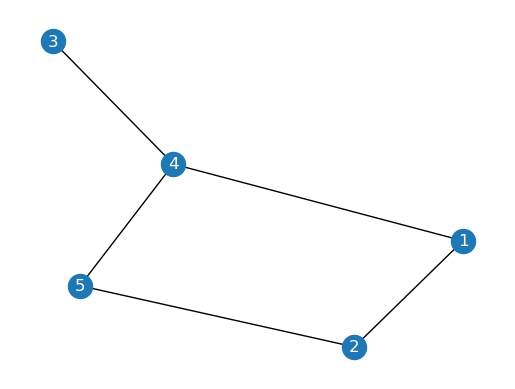

In [95]:
import matplotlib.pyplot as plt

nx.draw_networkx(G, font_color="white")
plt.axis('off');

In [96]:
NSMAP = {'tei': 'http://www.tei-c.org/ns/1.0'}


def character_network(tree):
    """Construct a character interaction network.

    Construct a character interaction network for Shakespeare texts in
    the Folger Digital Texts collection. Character interaction networks
    are constructed on the basis of successive speaker turns in the texts,
    and edges between speakers are created when their utterances follow
    one another.

    Arguments:
        tree: An lxml.ElementTree instance representing one of the XML
            files in the Folger Shakespeare collection.

    Returns:
        A character interaction network represented as a weighted,
        undirected NetworkX Graph.

    """
    G = nx.Graph()
    # extract a list of speaker turns for each scene in a play
    for scene in tree.iterfind('.//tei:div2[@type="scene"]', NSMAP):
        speakers = scene.findall('.//tei:sp', NSMAP)
        # iterate over the sequence of speaker turns...
        for i in range(len(speakers) - 1):
            # ... and extract pairs of adjacent speakers
            try:
                speaker_i = speakers[i].attrib['who'].split('_')[0].replace('#', '')
                speaker_j = speakers[i + 1].attrib['who'].split('_')[0].replace('#', '')
                # if the interaction between two speakers has already
                # been attested, update their interaction count
                if G.has_edge(speaker_i, speaker_j):
                    G[speaker_i][speaker_j]['weight'] += 1
                # else add an edge between speaker i and j to the graph
                else:
                    G.add_edge(speaker_i, speaker_j, weight=1)
            except KeyError:
                continue
    return G

In [97]:
tree = lxml.etree.parse('data/folger/xml/Ham.xml')
G = character_network(tree.getroot())

In [98]:
print(f"N nodes = {G.number_of_nodes()}, N edges = {G.number_of_edges()}")

N nodes = 38, N edges = 73


In [99]:
import collections

interactions = collections.Counter()

for speaker_i, speaker_j, data in G.edges(data=True):
    interaction_count = data['weight']
    interactions[speaker_i] += interaction_count
    interactions[speaker_j] += interaction_count

nodesizes = [interactions[speaker] * 5 for speaker in G]

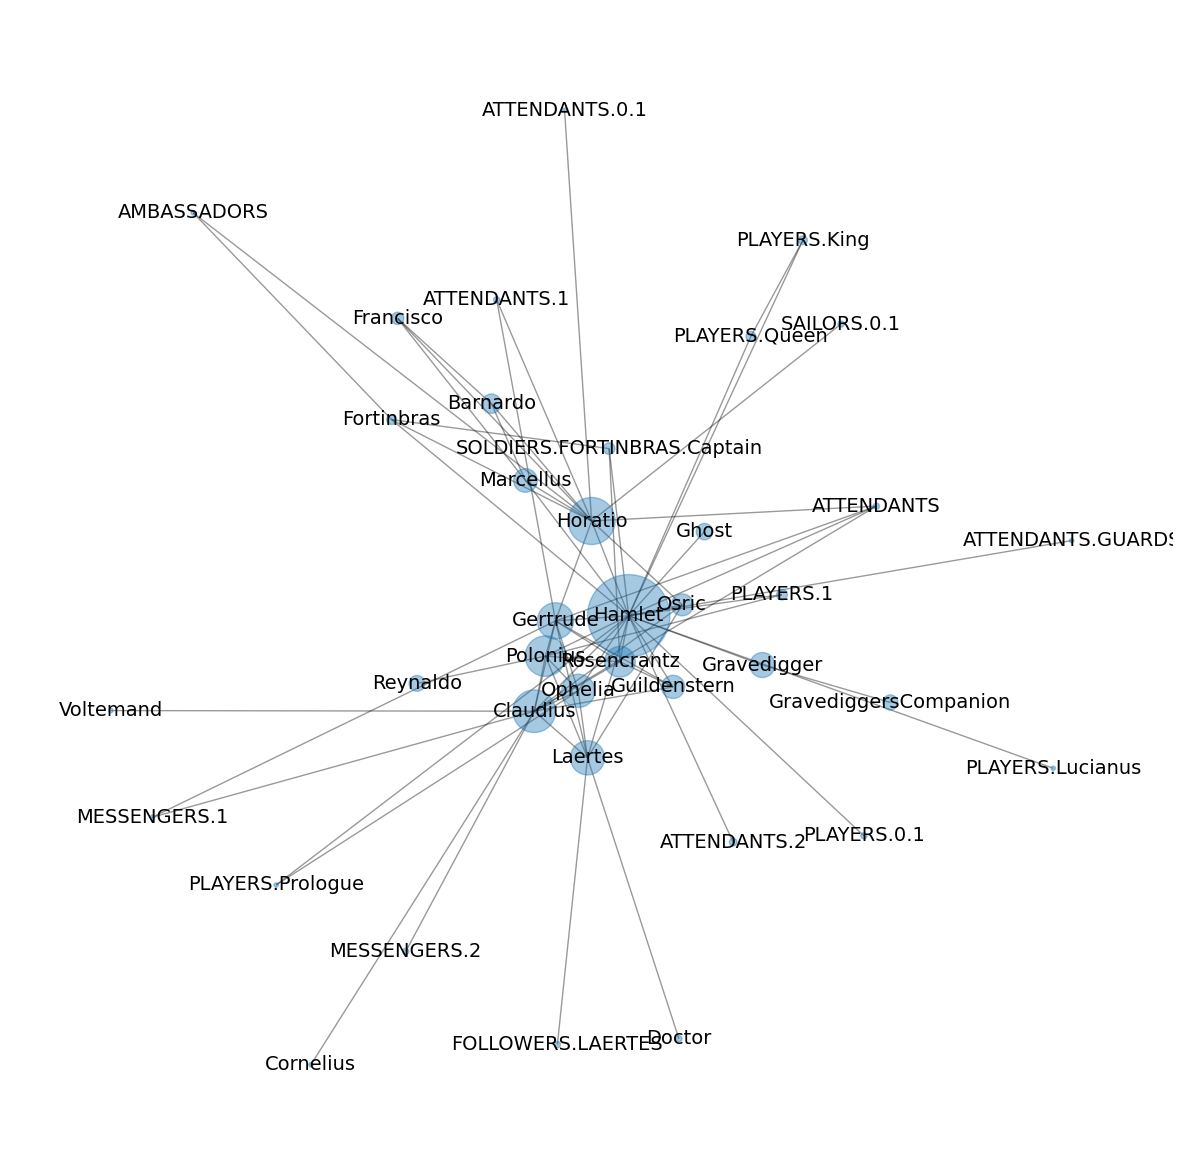

In [100]:
# Create an empty figure of size 15x15
fig = plt.figure(figsize=(15, 15))
# Compute the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, k=0.5, iterations=200)
# Then, add the edges to the visualization
nx.draw_networkx_edges(G, pos, alpha=0.4)
# Subsequently, add the weighted nodes to the visualization
nx.draw_networkx_nodes(G, pos, node_size=nodesizes, alpha=0.4)
# Finally, add the labels (i.e. the speaker IDs) to the visualization
nx.draw_networkx_labels(G, pos, font_size=14)
plt.axis('off');

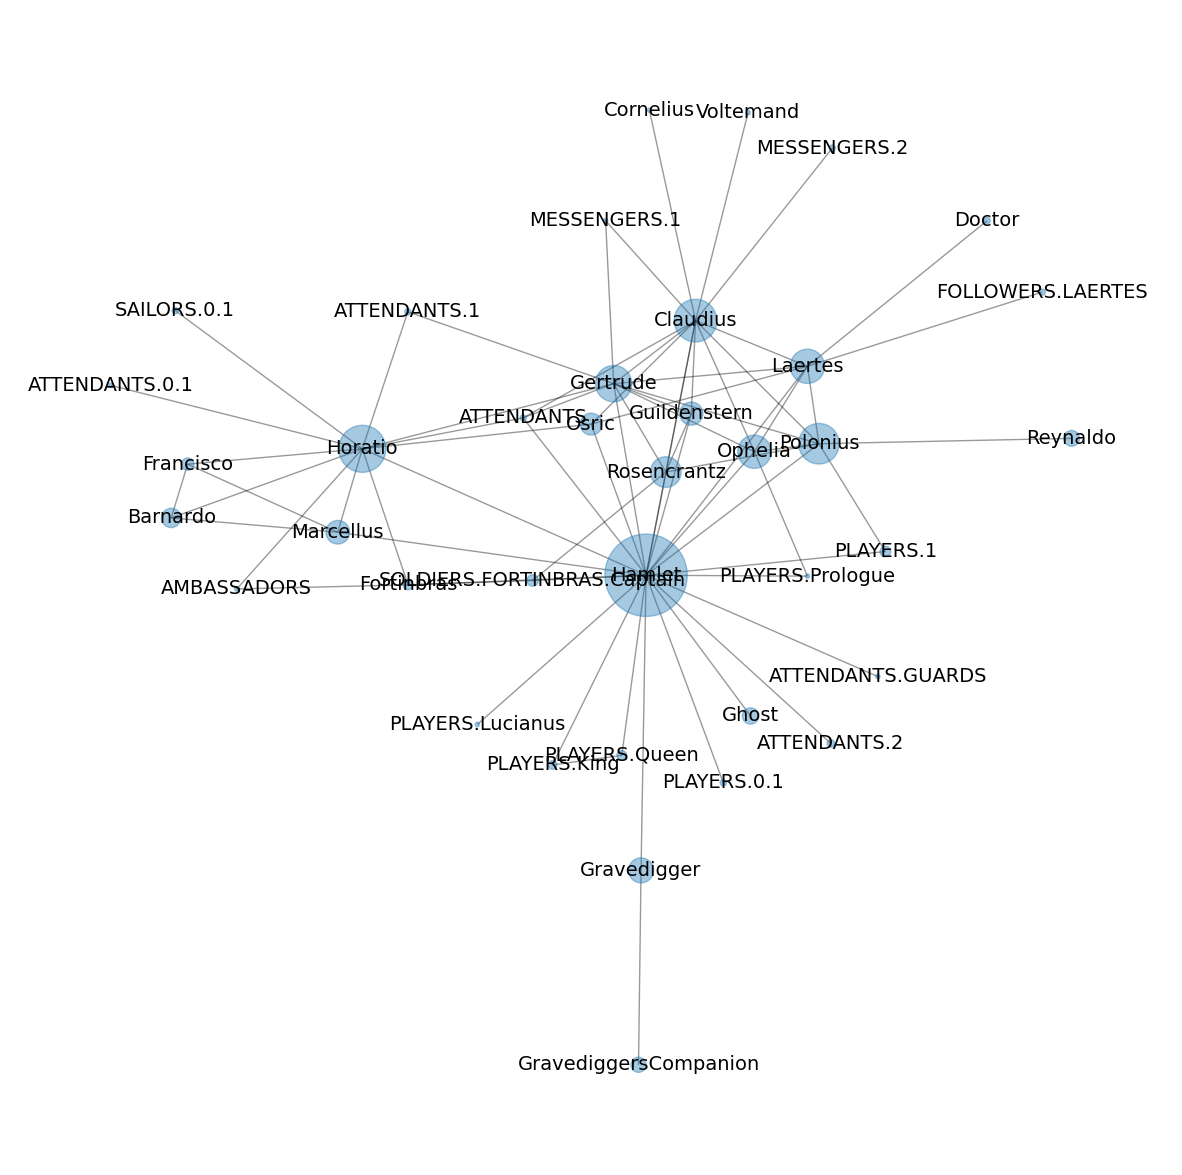

In [101]:
from copy import deepcopy
G0 = deepcopy(G)

for u, v, d in G0.edges(data=True):
    d['weight'] = 1

nodesizes = [interactions[speaker] * 5 for speaker in G0]

fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G0, k=0.5, iterations=200)
nx.draw_networkx_edges(G0, pos, alpha=0.4)
nx.draw_networkx_nodes(G0, pos, node_size=nodesizes, alpha=0.4)
nx.draw_networkx_labels(G0, pos, font_size=14)
plt.axis('off');

In [102]:
G0.remove_node('Hamlet')

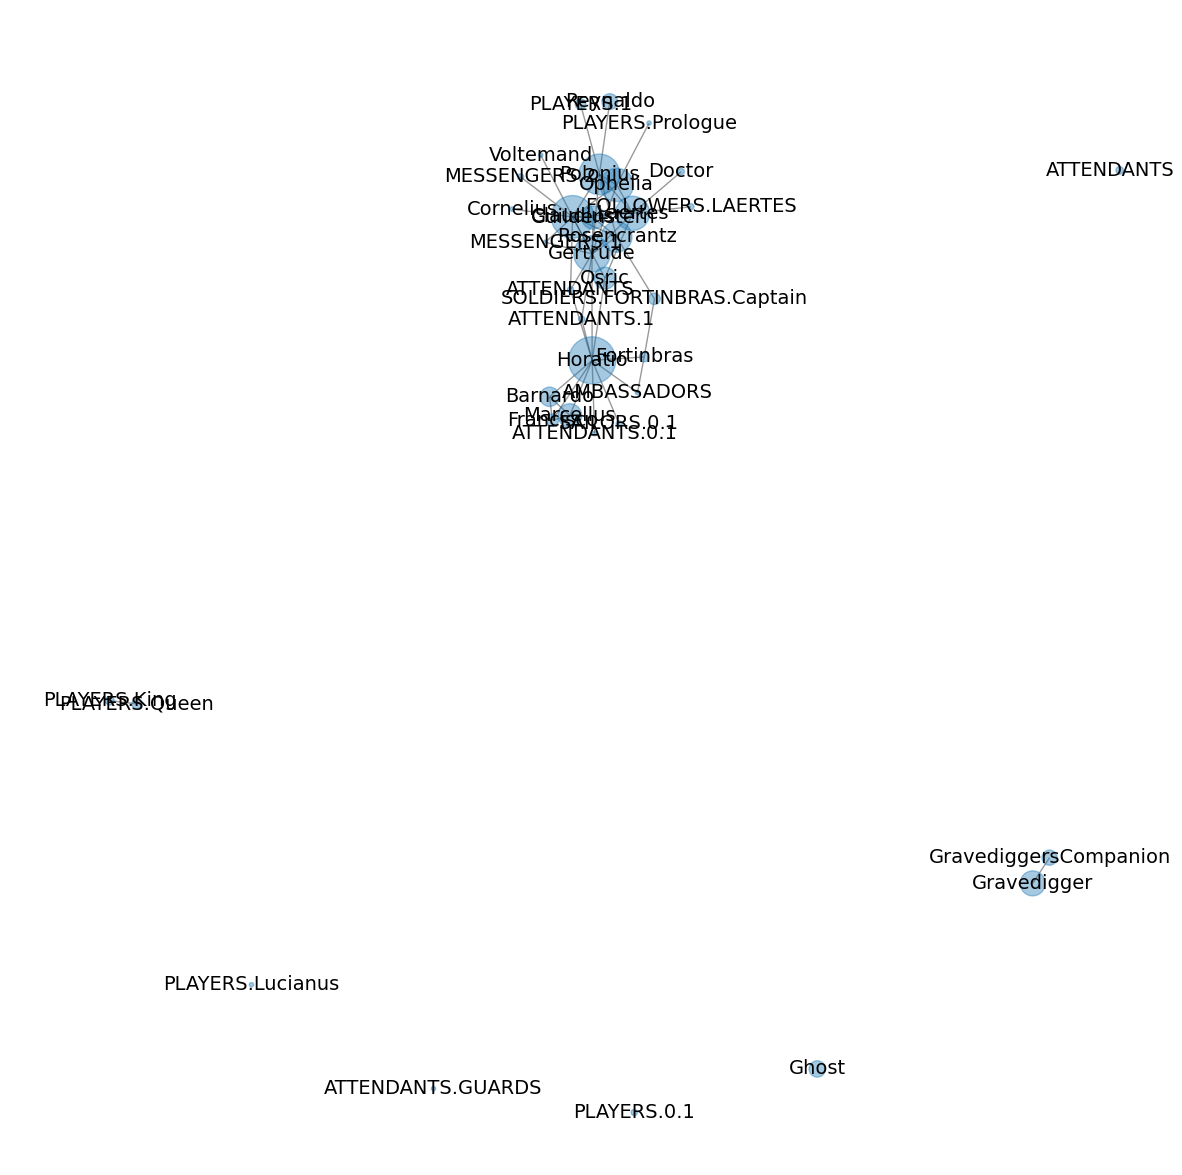

In [103]:
fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G0, k=0.5, iterations=200)
nodesizes = [interactions[speaker] * 5 for speaker in G0]
nx.draw_networkx_edges(G0, pos, alpha=0.4)
nx.draw_networkx_nodes(G0, pos, node_size=nodesizes, alpha=0.4)
nx.draw_networkx_labels(G0, pos, font_size=14)
plt.axis('off');

In [104]:
import json
from networkx.readwrite import json_graph

with open('hamlet.json', 'w') as f:
    json.dump(json_graph.node_link_data(G), f)

with open('hamlet.json') as f:
    d = json.load(f)

G = json_graph.node_link_graph(d)
print(f"Graph with {len(G.nodes())} nodes and {len(G.edges())} edges.")

Graph with 38 nodes and 73 edges.
